# Random Forest Project 

**This notebook was provided as part of the course 'Python for Data Science and Machine Learning Bootcamp' in Udemy. The code shown below was written by me as part of the solutions to the exercises and projects of the course.**

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

In [2]:
loans = pd.read_csv('loan_data.csv')

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Check for unbalanced classes

In [6]:
loans['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

*This is an unbalanced dataset, meaning that there are more datapoints that meets the credit underwriting criteria, than ones that not meet the criteria. This is important to have in mind when training the model.*

*For dealing with inbalanced classes I will use k-fold cross-validation. This technique should always be done before over-sampling the data, just as how feature selection should be implemented. Only by resampling the data repeatedly, randomness can be introduced into the dataset to make sure that there won’t be an overfitting problem.*

# Exploratory Data Analysis

**Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

Text(0.5, 0, 'FICO')

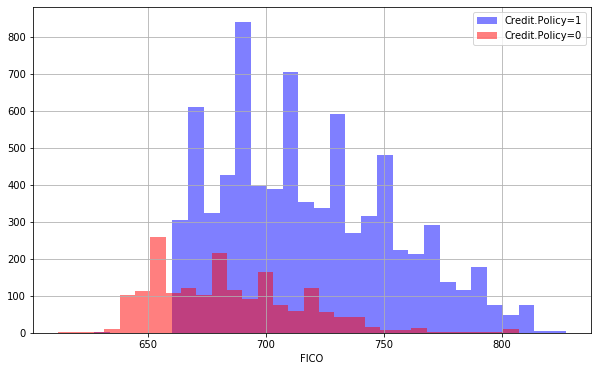

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

*The minimum FICO score to access a credit is around 660*

**Histogram of two FICO distributions on top of each other, one for each not.fully.paid column.**

Text(0.5, 0, 'FICO')

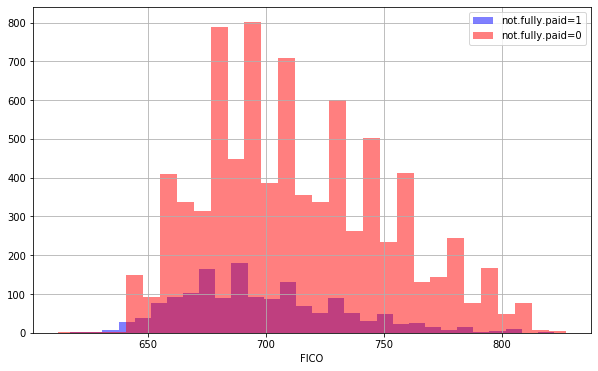

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

*The salmon-color bars indicate that most people are fully paying their loans, while the people that are not paying (purple bars)have very variable FICO scores, from bad to very good. FICO score by its onw seems not to be that determinant when predicting the outcome of the credit.*

**Countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.**

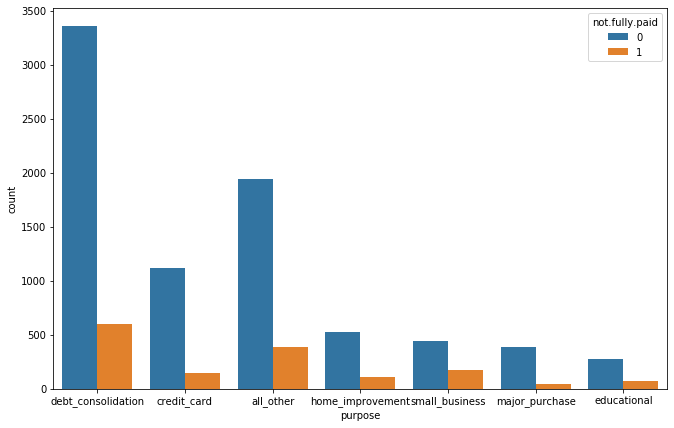

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans)

*Debt consolidation is the most popular purpose of credits*

**Jointplot to see the trend between FICO score and interest rate.**

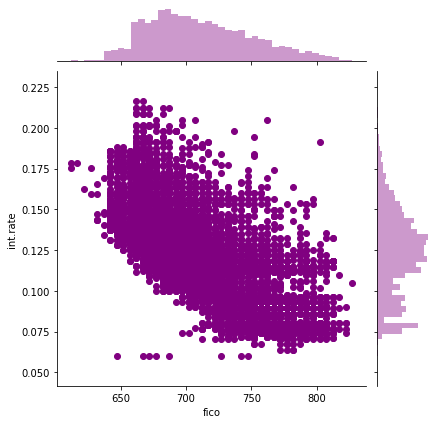

In [10]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

*Higher credit scores the loans have low interest rates*

**lmplots to see if the trend differed between not.fully.paid and credit.policy.**

<Figure size 792x504 with 0 Axes>

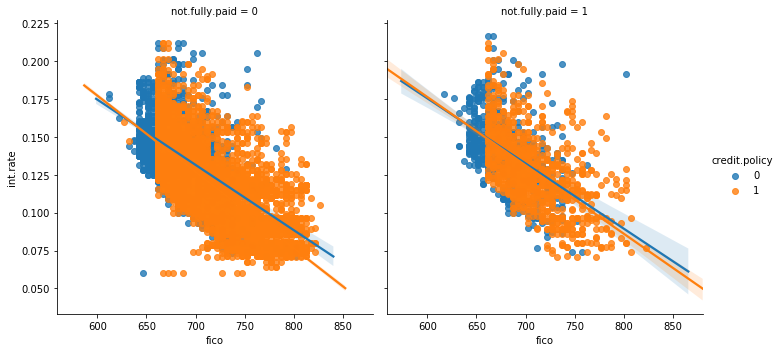

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid')

*Higher credit scores (FICO) yield lower interest rates.*

# Setting up the Data

## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [12]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [13]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

**Split your data into a training set and a testing set as we've done in the past.**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=final_data.drop('not.fully.paid', axis=1)
y=final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
print('Classification Report: ')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test,predictions))
print('\n')
print('Accuracy Score: ',accuracy_score(y_test,predictions))

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



Confusion Matrix: 
[[1988  443]
 [ 338  105]]


Accuracy Score:  0.7282533054975644


## Training the Random Forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier()

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [25]:
rfc_predict = rfc.predict(X_test) 

In [26]:
print('Classification Report: ')
print(classification_report(y_test,rfc_predict))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test,rfc_predict))
print('\n')
print('Accuracy Score: ',accuracy_score(y_test,rfc_predict))

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.42      0.02      0.05       443

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



Confusion Matrix: 
[[2416   15]
 [ 432   11]]


Accuracy Score:  0.8444676409185804


# Improving prediction metrics with Cross Validation

In [27]:
from sklearn.pipeline import Pipeline

**Create a pipeline**

In [28]:
my_pipeline = Pipeline(steps=[('model', RandomForestClassifier(n_estimators=50,
                                                              random_state=101))
                             ])

**Execute 5-fold cross validation**

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
scores = cross_val_score(my_pipeline, X_train, y_train,
                              cv=5,
                              scoring='accuracy')
scores

array([0.8344519 , 0.83594333, 0.83519761, 0.8344519 , 0.8380597 ])

*Doing cross validation reduces accuracy score from 0.85 to 0.838 (best cross validation score)*

**Test different estimators (number of trees/forest)**

In [31]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[('model', 
                                   RandomForestClassifier(n_estimators, 
                                                         random_state=101))
                                 ])
    
    scores = cross_val_score(my_pipeline, X_train, y_train,
                                  cv=5,
                                  scoring='accuracy')
    return scores.mean()

results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

results

{50: 0.8356208888443689,
 100: 0.8342774939619575,
 150: 0.8354710786114172,
 200: 0.8351730163500172,
 250: 0.8347254777566308,
 300: 0.8344269702939442,
 350: 0.8354713012120605,
 400: 0.8347254777566308}

*As we can see the best accuracy after iterating different estimator number is 0.835, which isn't a significant improvement to our previous models. Lets train a Gradient Boosted Tree model*

# Training and Testing a Random Boosted Trees

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

In [33]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test) 

In [34]:
print('Classification Report: ')
print(classification_report(y_test,gbc_predict))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test,gbc_predict))
print('\n')
print('Accuracy Score: ',accuracy_score(y_test,gbc_predict))

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.39      0.02      0.04       443

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.48      2874
weighted avg       0.78      0.84      0.78      2874



Confusion Matrix: 
[[2417   14]
 [ 434    9]]


Accuracy Score:  0.8441196938065414


# Tunning Random Boosted Trees parameters with Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [47]:
grid = GridSearchCV(GradientBoostingClassifier(),param_grid,
                    refit=True,cv=2, n_jobs=-1)

In [48]:
grid.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
       0.28181818

In [49]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 10,
 'subsample': 0.5}

In [56]:
gbc2 = GradientBoostingClassifier(criterion= 'friedman_mse',
                                  learning_rate= 0.01,
                                  loss= 'deviance',
                                  max_depth= 3,
                                  max_features= 'log2',
                                  min_samples_leaf= 0.1,
                                  min_samples_split= 0.1,
                                  n_estimators= 10,
                                  subsample= 0.5)
gbc2.fit(X_train, y_train)
gbc_predict2 = gbc2.predict(X_test) 

In [59]:
print('Classification Report: ')
print(classification_report(y_test,gbc_predict2))
print('\n')
print('Confusion Matrix: ')
print(confusion_matrix(y_test,gbc_predict2))
print('\n')
print('Accuracy Score: ',accuracy_score(y_test,gbc_predict2))

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



Confusion Matrix: 
[[2431    0]
 [ 443    0]]


Accuracy Score:  0.8458594293667363


# The accuracy of our tunned model has slightly increased to 0.85. There wasn't a significant change in avg precision, recall and support.  